# Geoprostorové vizualizace

# Choroplethová mapa

Time difference of 1.262625 secs


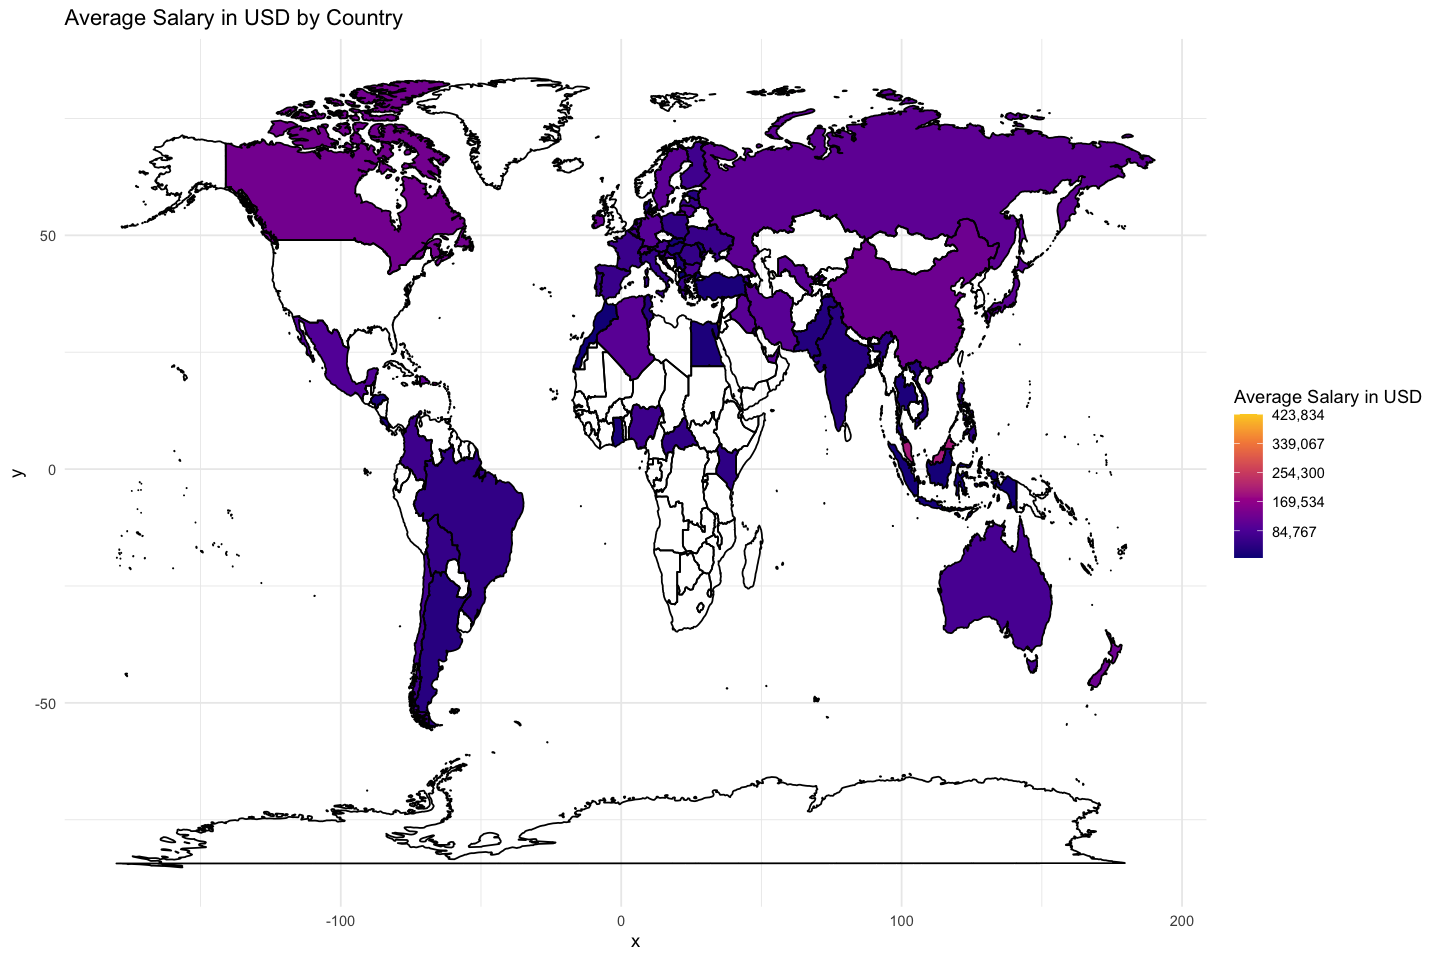

In [16]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(countrycode)
library(maps)  # for the 'world' dataset
library(viridis)  # for the 'plasma' color scheme

# load data stored in a CSV file
df <- read.csv('data/ds_salaries.csv')

# Convert two-letter country codes to country names
df$employee_residence <- countrycode(df$employee_residence, 'iso2c', 'country.name')

# Group by 'employee_residence' and calculate the average 'salary_in_usd'
avg_salaries <- aggregate(salary_in_usd ~ employee_residence, df, mean)

# Replace NA values with 0
avg_salaries[is.na(avg_salaries)] <- 0

# Create a dataframe with country codes and average salaries
country_data <- data.frame(
  region = avg_salaries$employee_residence,
  salary_in_usd = avg_salaries$salary_in_usd
)

# Get the world map data
world_map <- map_data('world')

# Set the plot size 
options(repr.plot.width=12, repr.plot.height=8)

# Create a choropleth map
ggplot() +
  geom_map(data=country_data, map=world_map, aes(map_id=region, fill=salary_in_usd)) +
  geom_map(data=world_map, map=world_map, aes(map_id=region), fill=NA, color="black") +
  expand_limits(x = world_map$long, y = world_map$lat) +
  scale_fill_viridis_c(name="Average Salary in USD", labels=scales::comma_format(), 
                        breaks=seq(0, max(country_data$salary_in_usd), length.out=6), 
                        option="plasma", direction=1, end=0.9, na.value="grey50") +
  labs(title="Average Salary in USD by Country") +
  theme_minimal()

end.time <- Sys.time()
print(end.time - start.time)

# Časové vizualizace

# Čárový graf

Time difference of 0.19608 secs


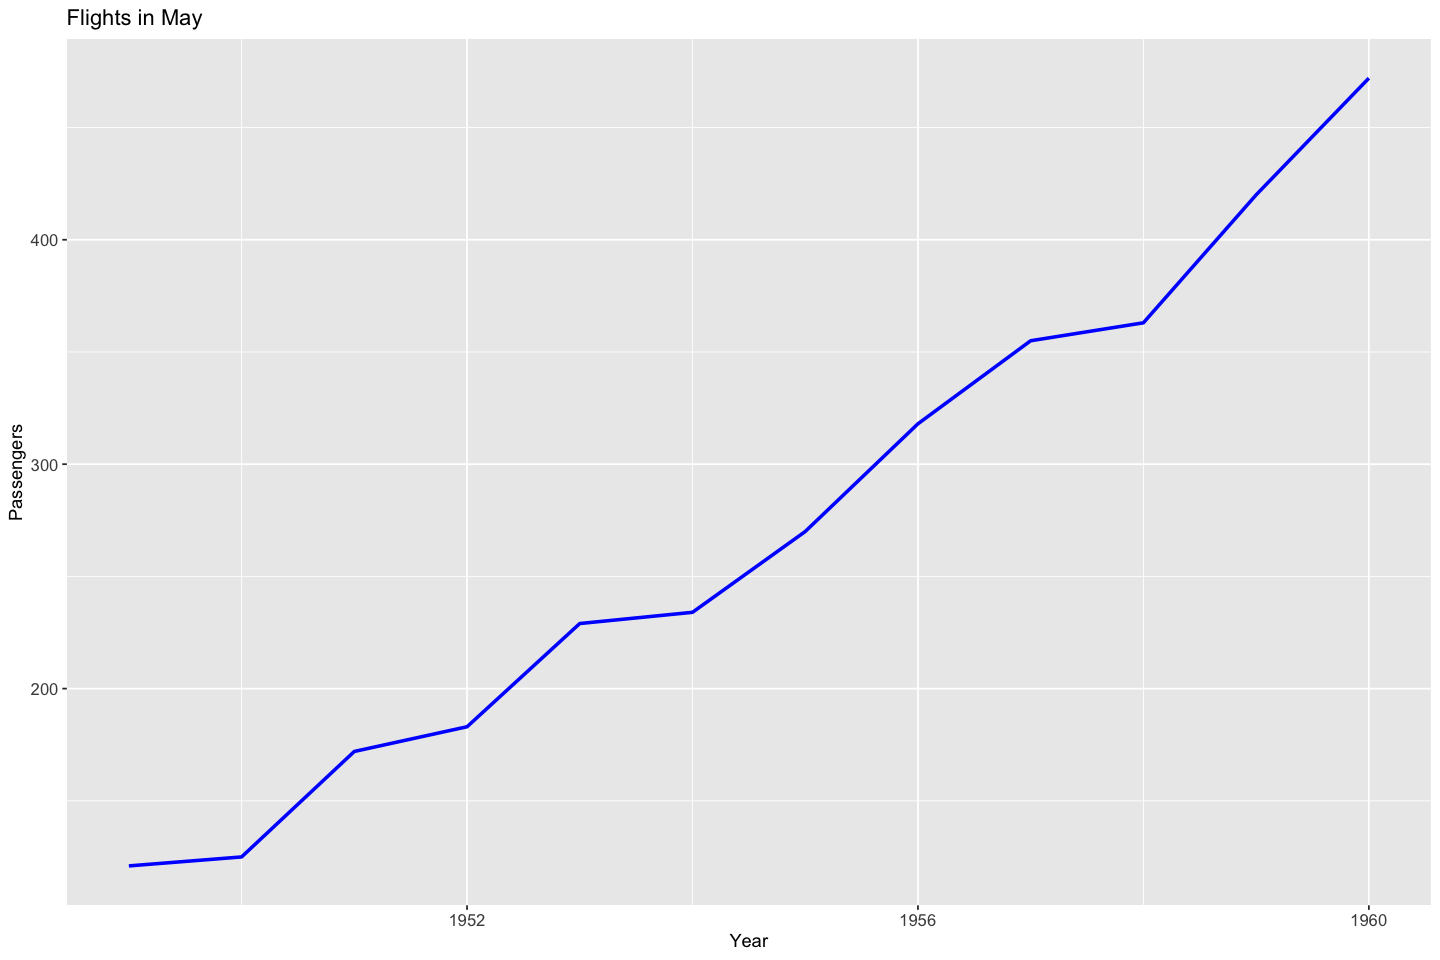

In [17]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(dplyr)

# load data stored in a CSV file
df <- read.csv("data/flights.csv")

# Filter the data for May flights
may_flights <- df %>% filter(month == "May")

# Create line plot
ggplot(may_flights, aes(x = year, y = passengers)) +
  geom_line(color = "blue", size = 1) +
  labs(title = "Flights in May", x = "Year", y = "Passengers") +
  theme(axis.text = element_text(size = 10))

end.time <- Sys.time()
print(end.time - start.time)

# Skládaný plošný graf

Time difference of 0.5152421 secs


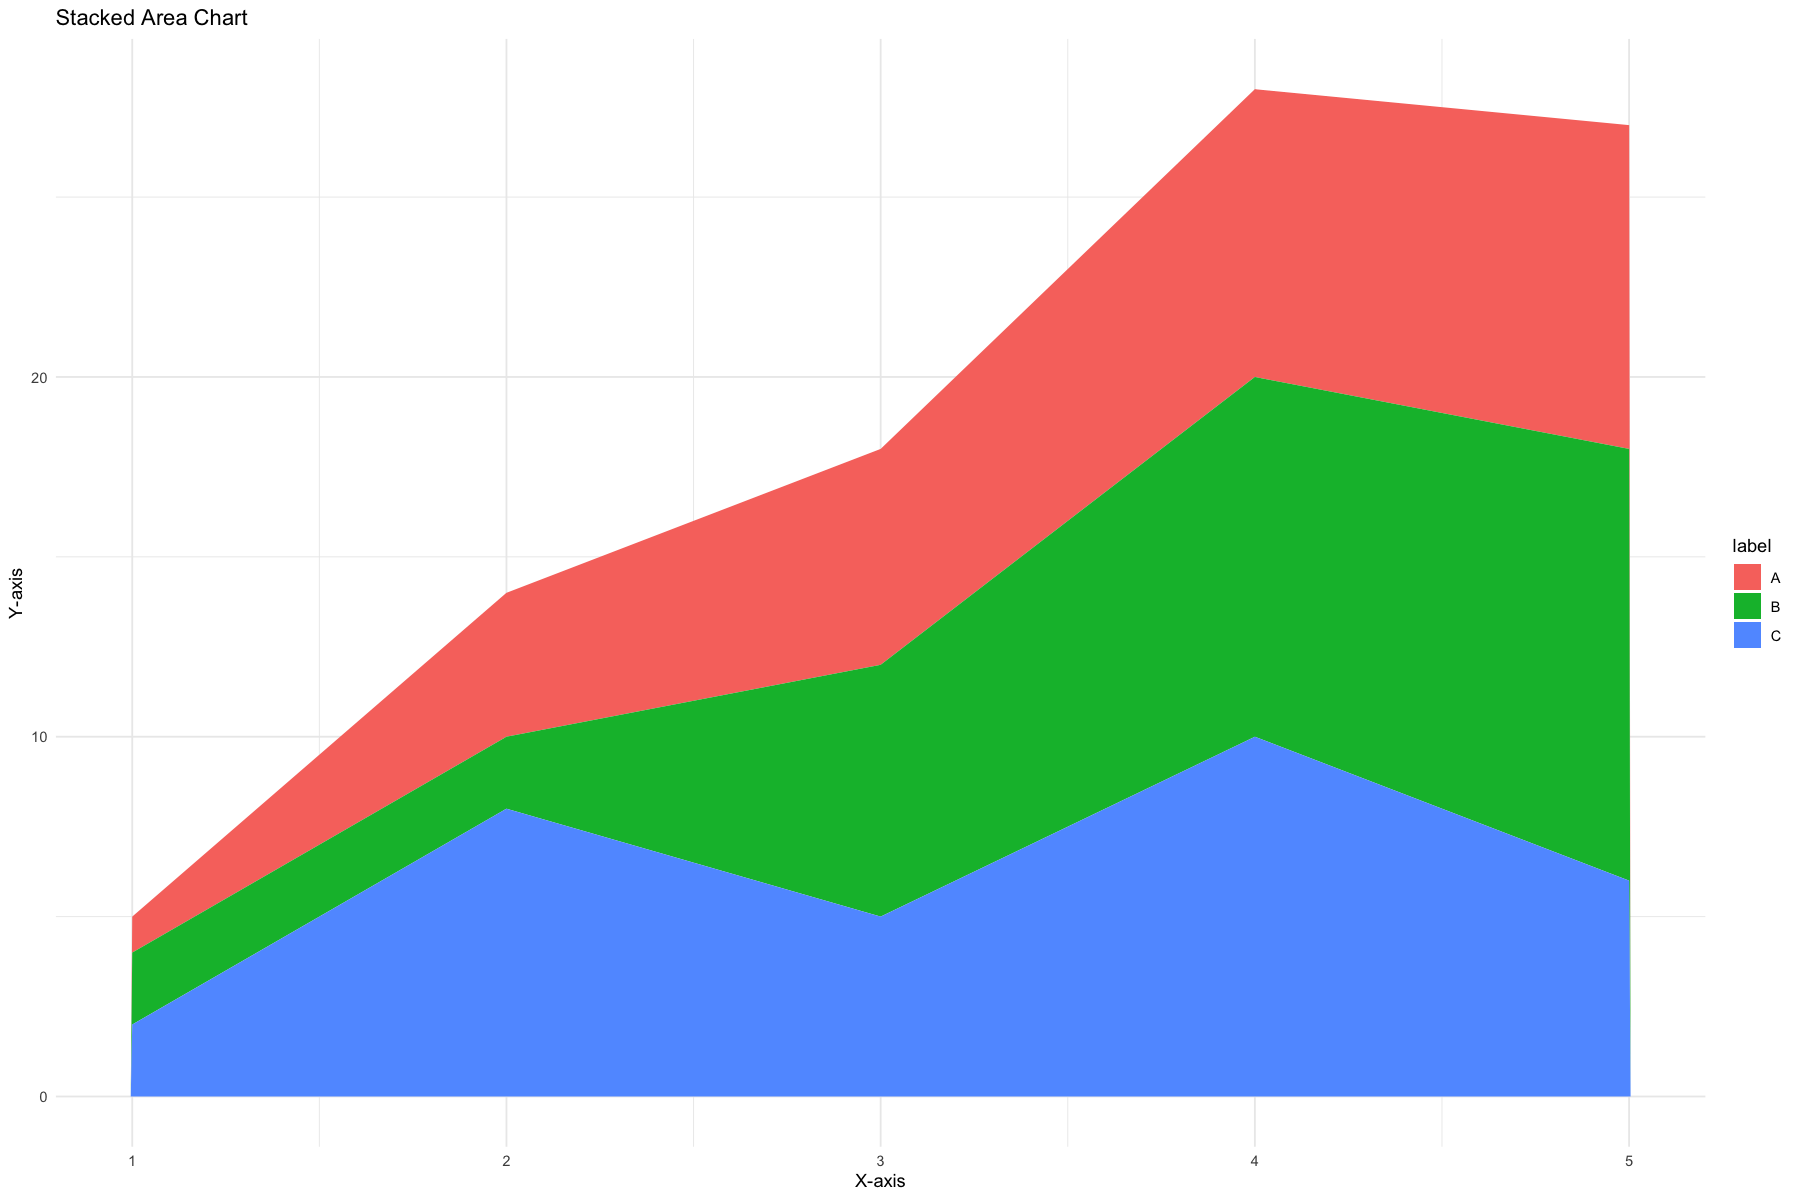

In [3]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load necessary library
library(ggplot2)

# Data
x <- 1:5
y <- data.frame(
  x = rep(x, 3),
  y = c(1, 4, 6, 8, 9, 2, 2, 7, 10, 12, 2, 8, 5, 10, 6),
  label = rep(c('A', 'B', 'C'), each = length(x))
)

# Plot
ggplot(y, aes(x = x, y = y, fill = label)) +
  geom_area() +
  labs(x = 'X-axis', y = 'Y-axis', title = 'Stacked Area Chart') +
  theme_minimal()

end.time <- Sys.time()
print(end.time - start.time)

# Relační vizualizace

# Koláčový graf

Time difference of 0.4523621 secs


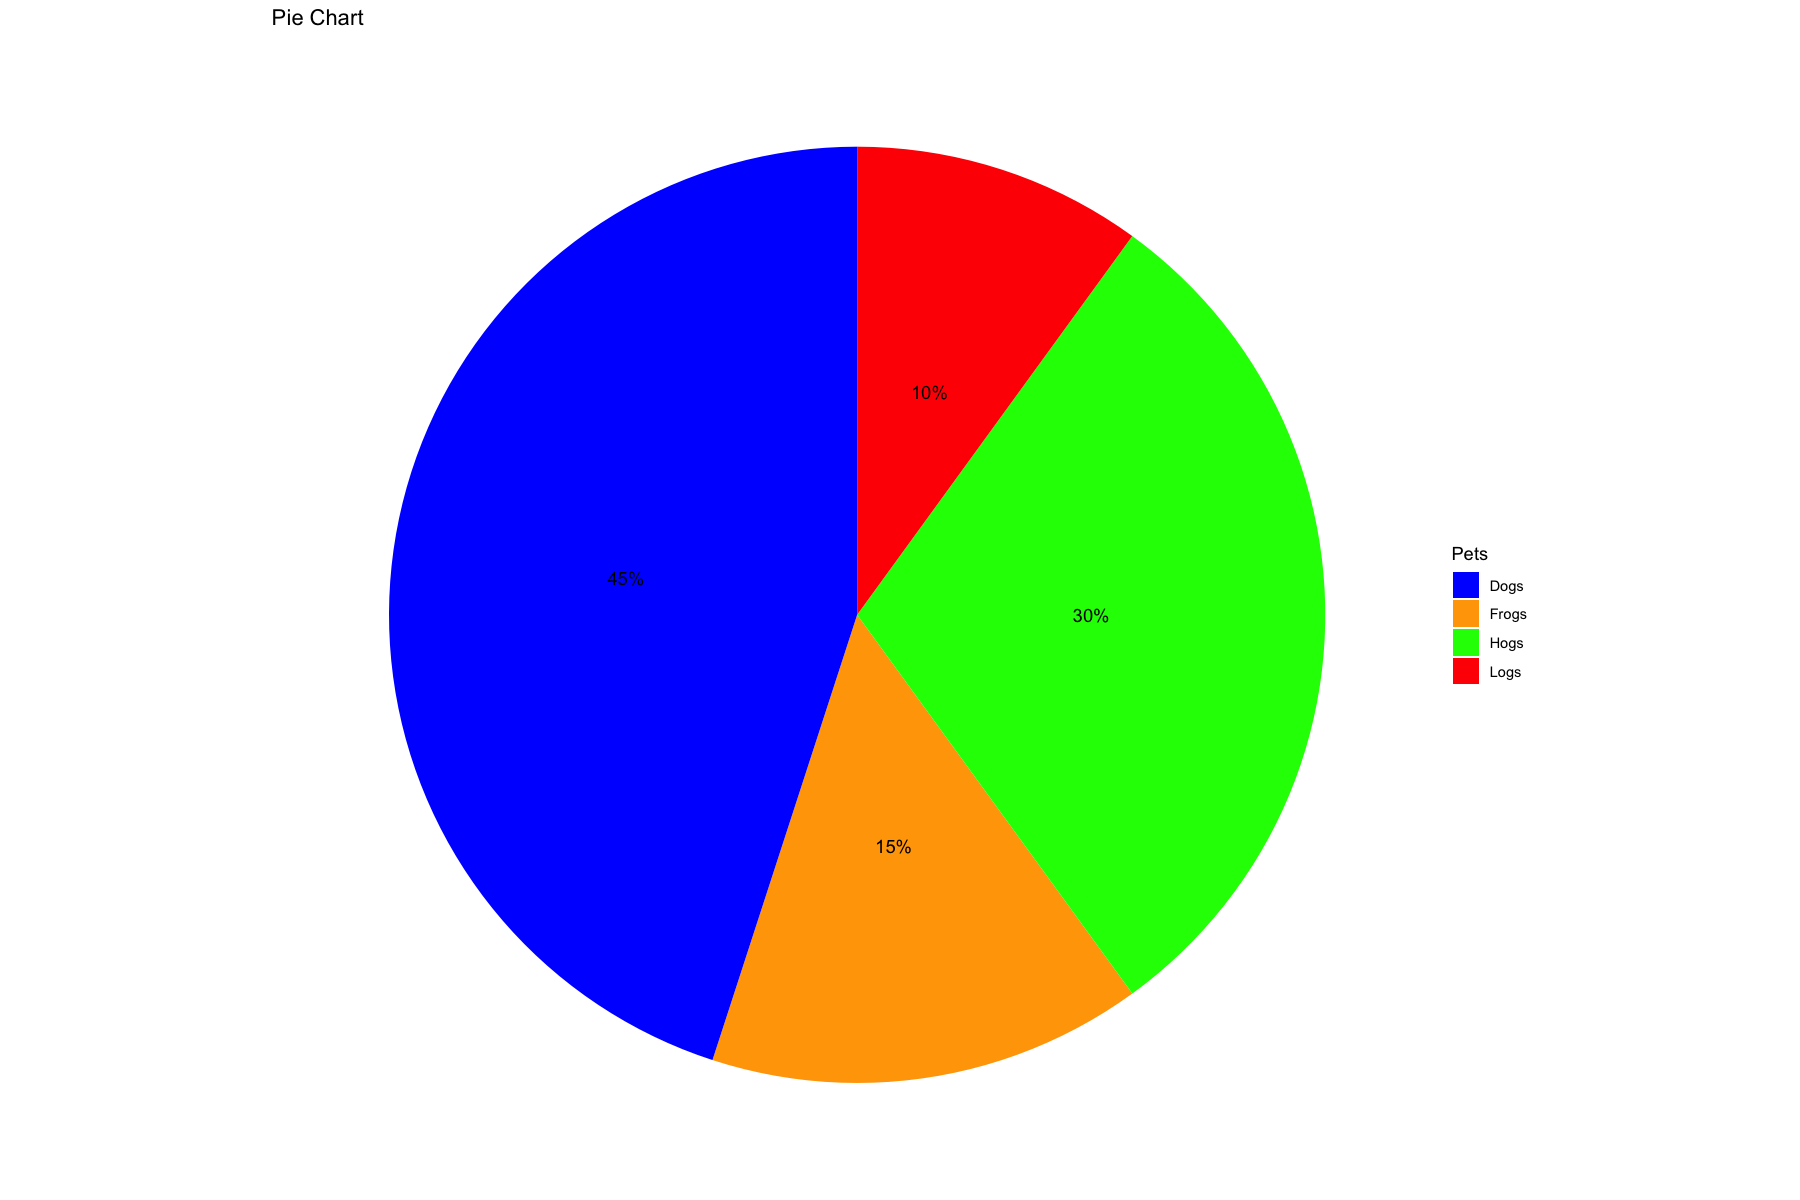

In [4]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)

# Declare data
data <- c(15, 30, 45, 10)
keys <- c('Frogs', 'Hogs', 'Dogs', 'Logs')

# Define colors for the pie chart
colors <- c('blue', 'orange', 'green', 'red')

# Create dataframe
df <- data.frame(keys, data)

# Calculate percentages
df$percentage <- df$data / sum(df$data)

# Plot
ggplot(df, aes(x = "", y = data, fill = keys)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  scale_fill_manual(values = colors, name = "Pets") +
  theme_void() +
  labs(title = "Pie Chart") +
  geom_text(aes(label = paste0(round(percentage*100), "%")), position = position_stack(vjust = 0.5))

end.time <- Sys.time()
print(end.time - start.time)

# Matice bodového grafu

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Time difference of 5.919543 secs


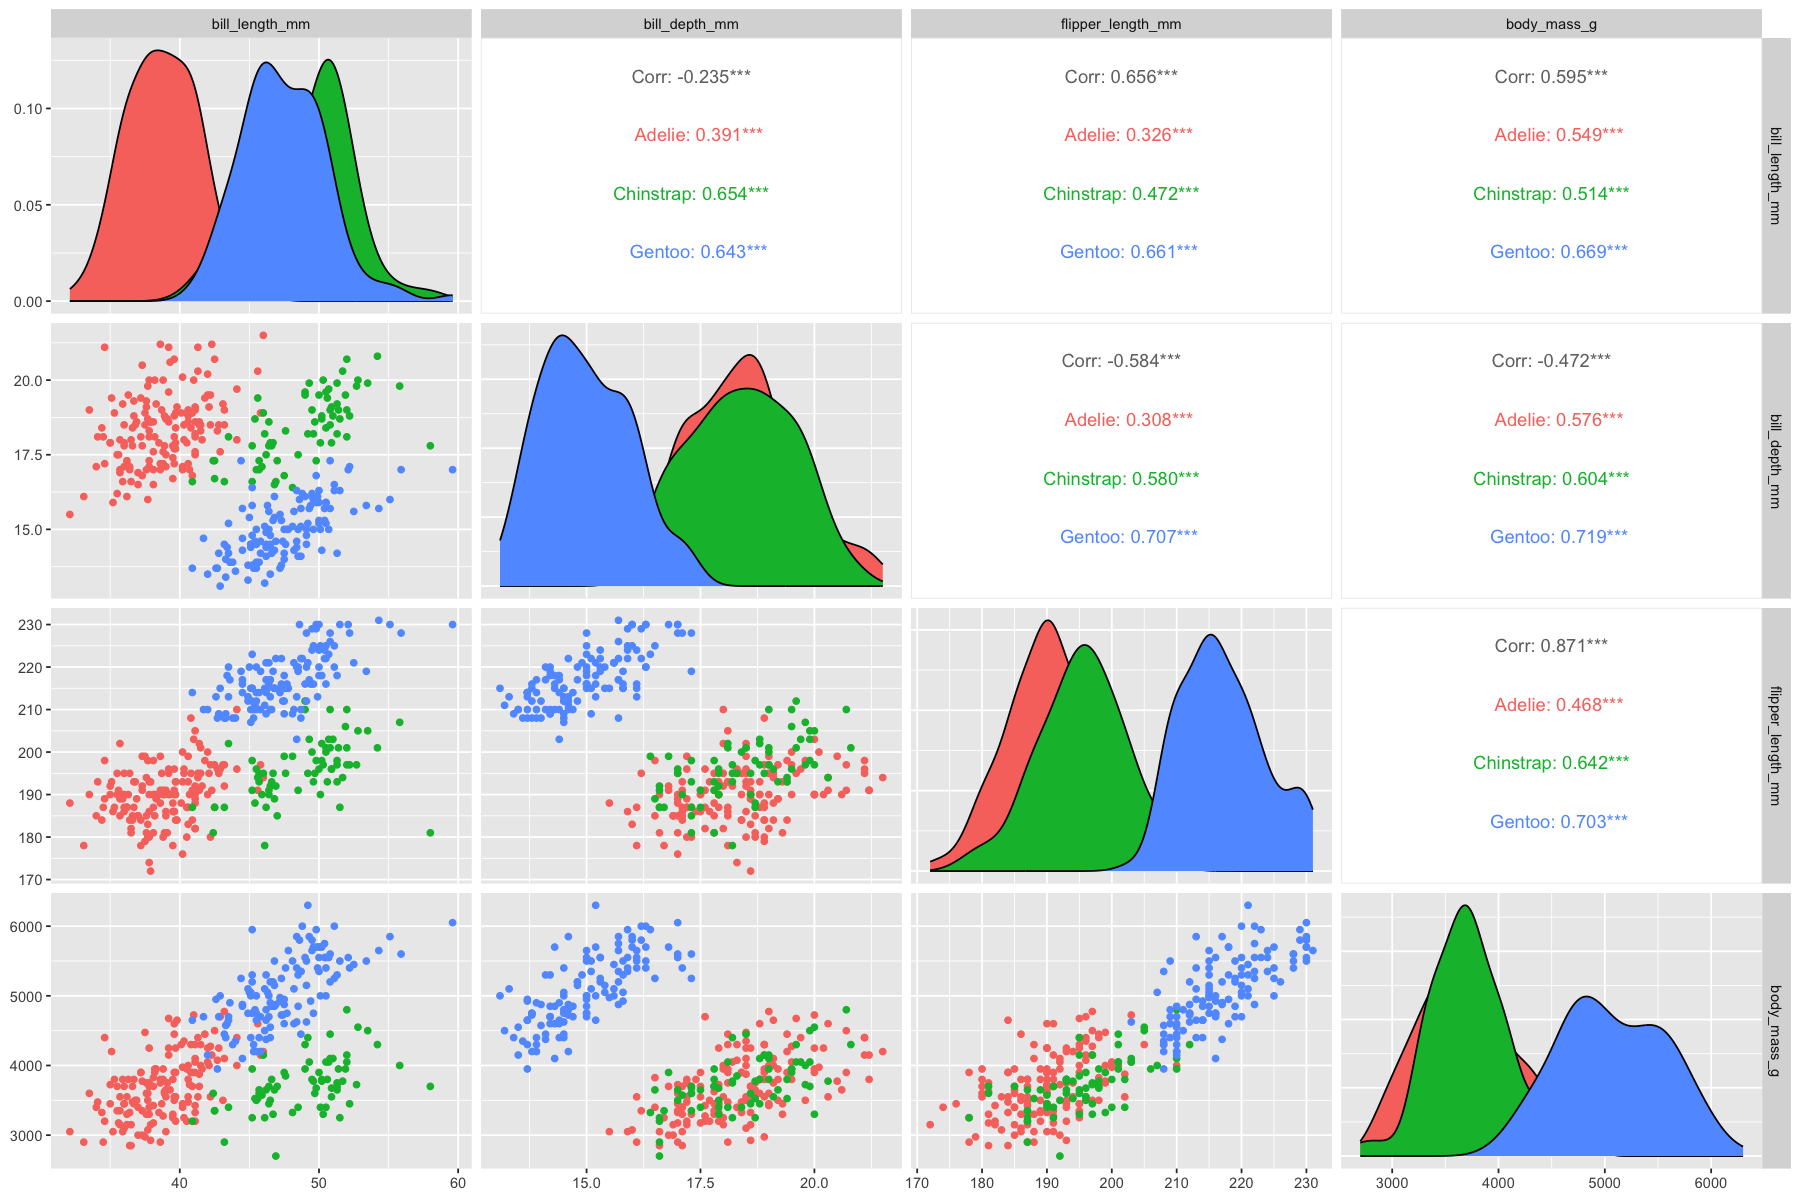

In [5]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(GGally)
library(ggplot2)

# Set the default plot size
options(repr.plot.width=15, repr.plot.height=10)

# load data stored in a CSV file
df <- read.csv("data/penguins.csv")

# Remove rows with non-finite values
df <- df[complete.cases(df), ]

# Define category orders
df$species <- factor(df$species, levels = c("Adelie", "Chinstrap", "Gentoo"))

# Create scatterplot matrix
ggpairs(df, columns = c("bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"), 
        mapping = ggplot2::aes(color = species))

end.time <- Sys.time()
print(end.time - start.time)


Attache Paket: ‘gridExtra’


Das folgende Objekt ist maskiert ‘package:dplyr’:

    combine




Time difference of 2.149633 secs


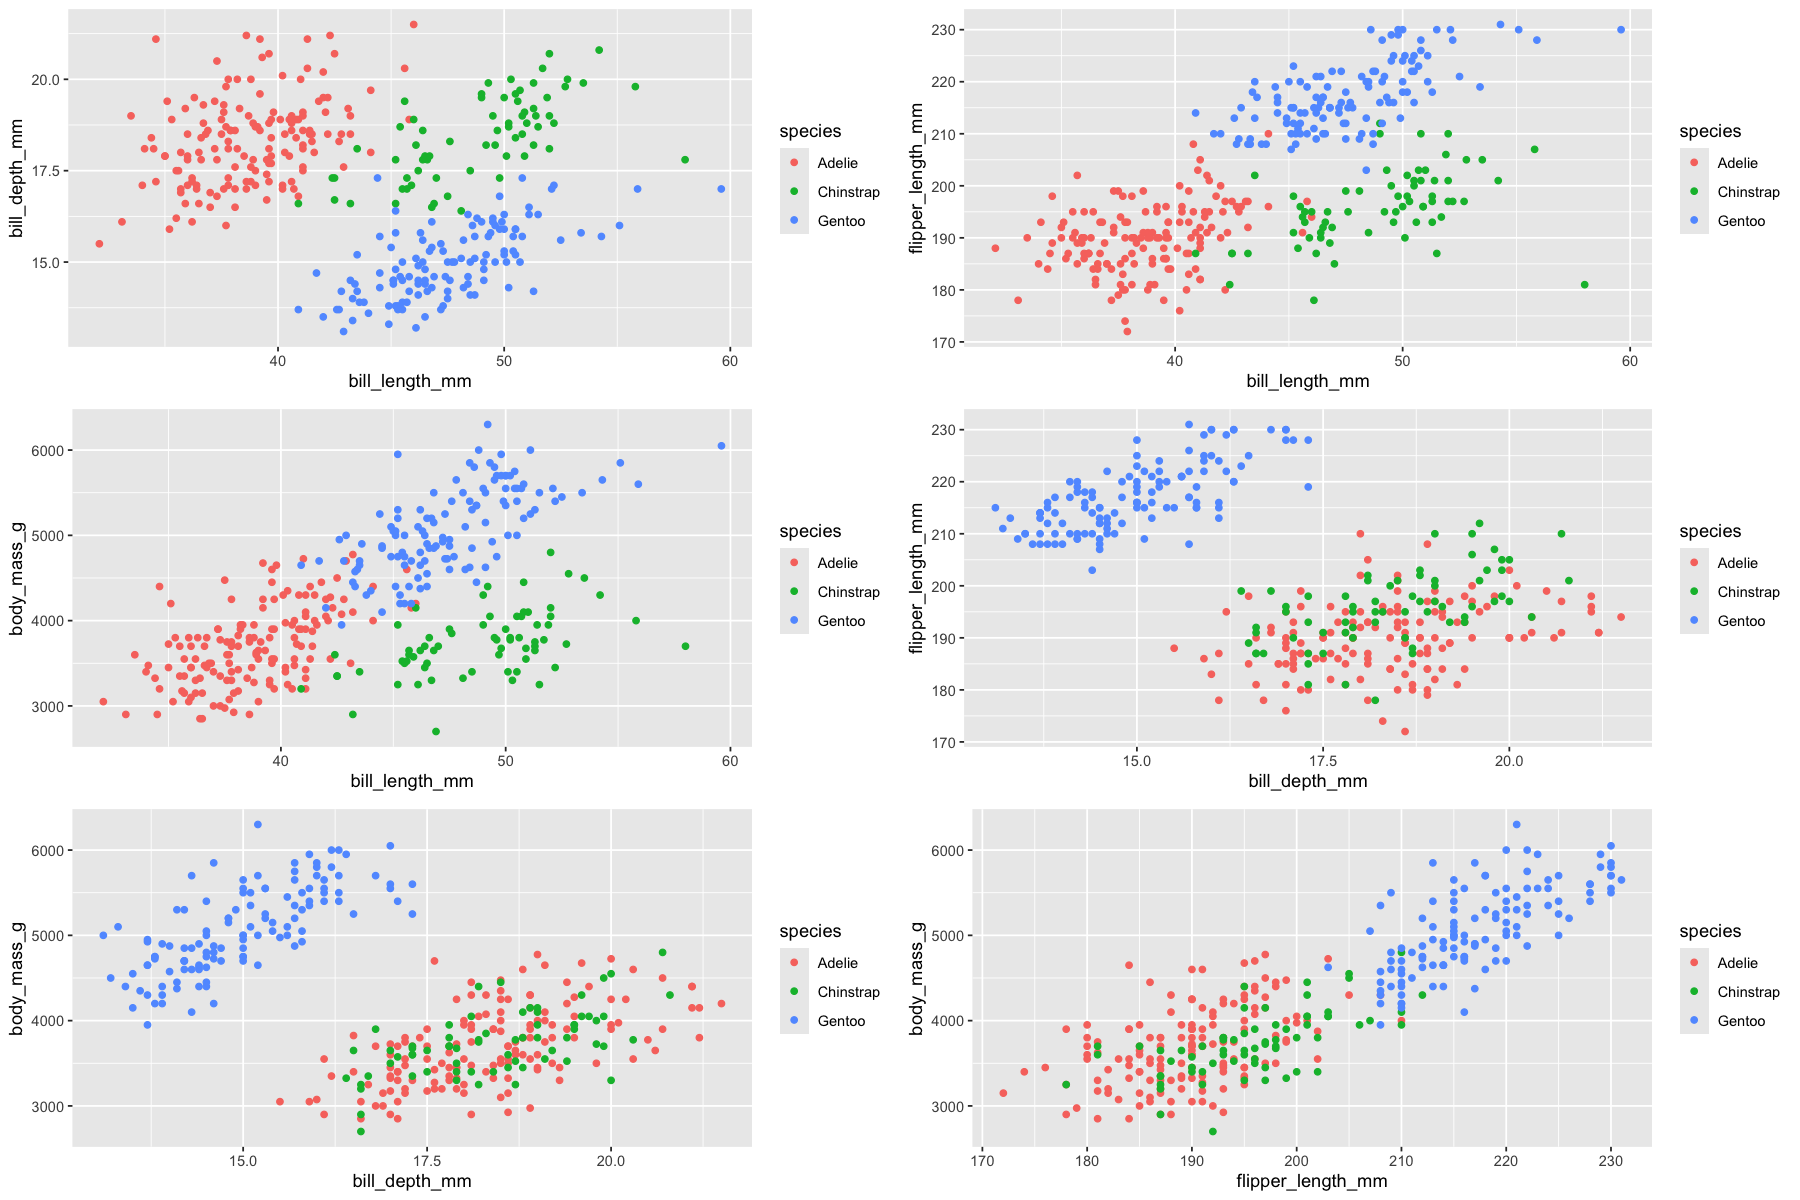

In [6]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(gridExtra)

# load data stored in a CSV file
df <- read.csv("data/penguins.csv")

# Remove rows with non-finite values
df <- df[complete.cases(df), ]

# Define category orders
df$species <- factor(df$species, levels = c("Adelie", "Chinstrap", "Gentoo"))

# Create scatterplots
p1 <- ggplot(df, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) + geom_point()
p2 <- ggplot(df, aes(x = bill_length_mm, y = flipper_length_mm, color = species)) + geom_point()
p3 <- ggplot(df, aes(x = bill_length_mm, y = body_mass_g, color = species)) + geom_point()
p4 <- ggplot(df, aes(x = bill_depth_mm, y = flipper_length_mm, color = species)) + geom_point()
p5 <- ggplot(df, aes(x = bill_depth_mm, y = body_mass_g, color = species)) + geom_point()
p6 <- ggplot(df, aes(x = flipper_length_mm, y = body_mass_g, color = species)) + geom_point()

# Arrange scatterplots in a grid
grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2)

end.time <- Sys.time()
print(end.time - start.time)

# Stromová mapa

Time difference of 4.917148 secs


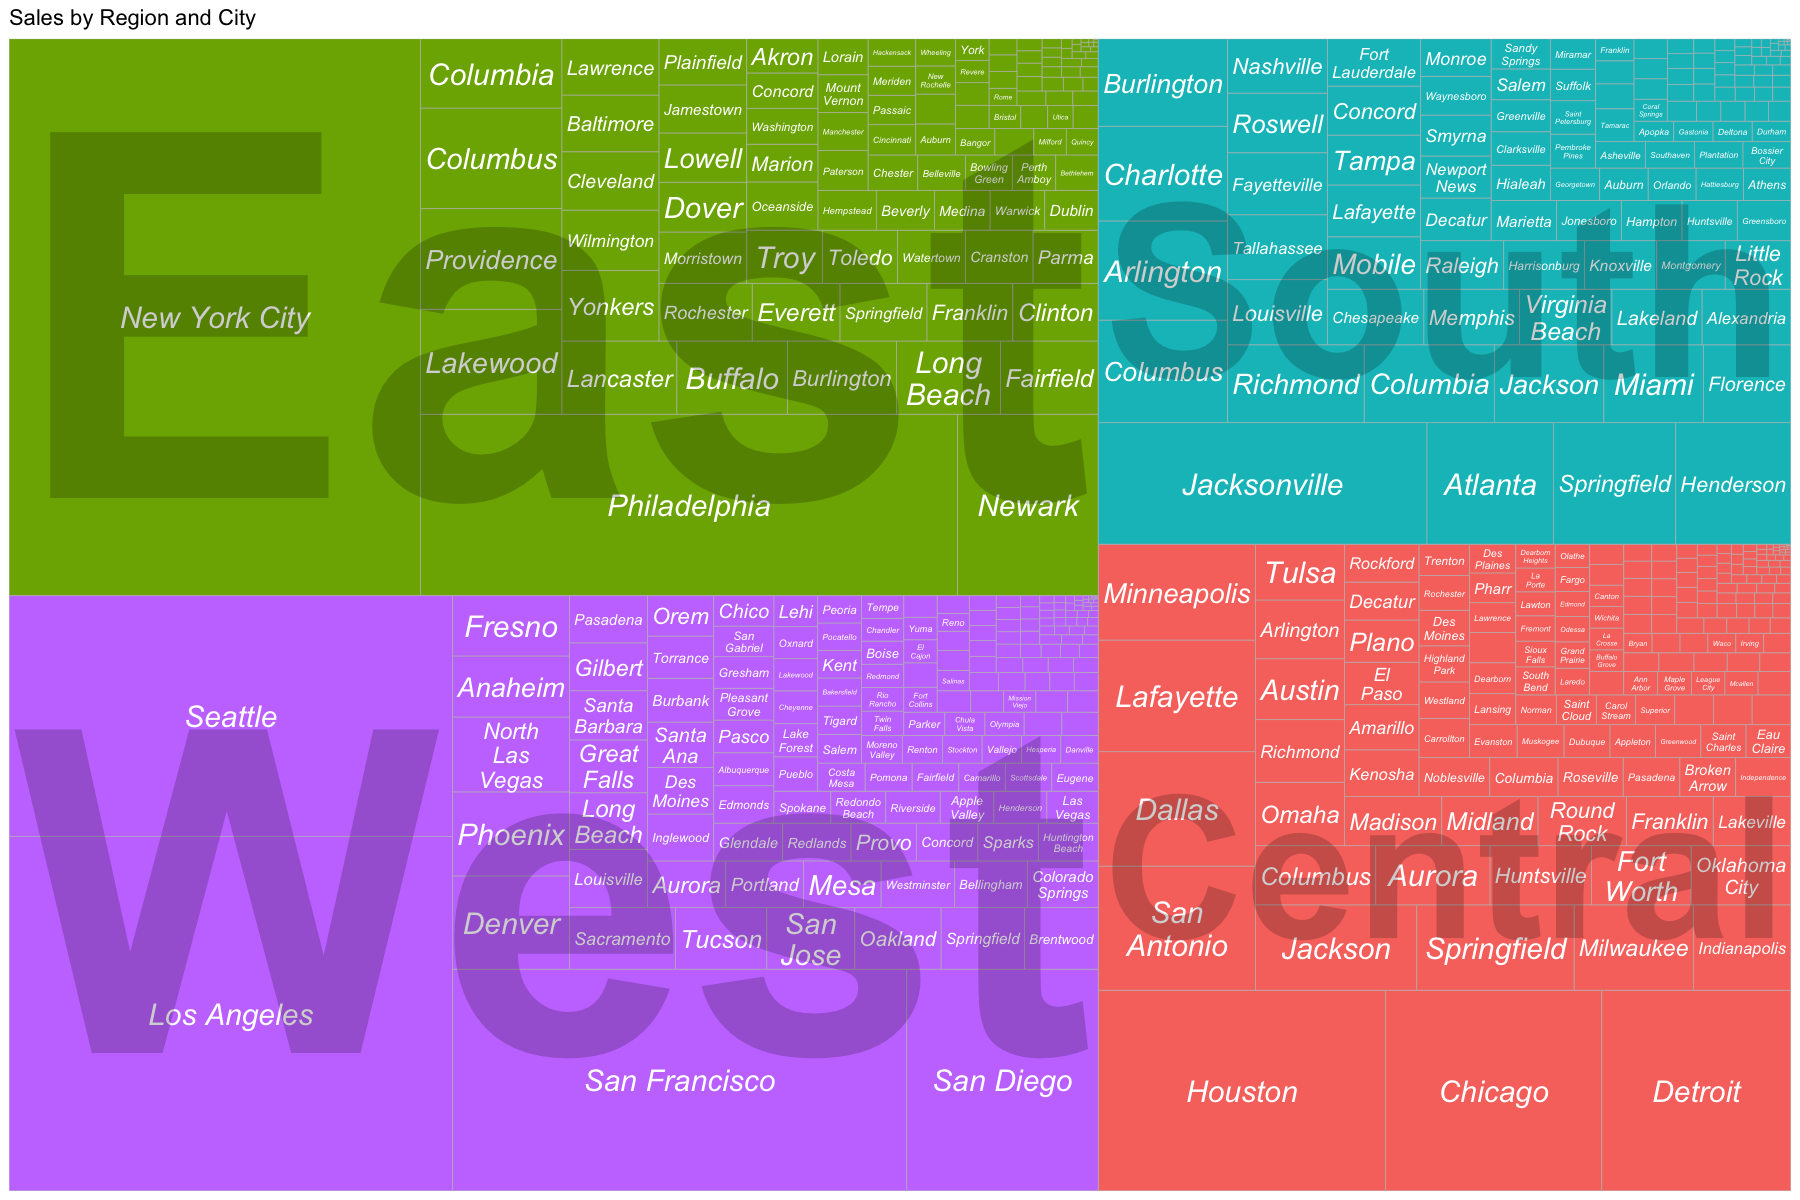

In [7]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(treemapify)
library(dplyr)

# load data stored in a CSV file
data <- read.csv("data/SampleSuperstore.csv")

# Prepare data
data <- data %>% select(City, Region, Sales)
sales_by_city <- data %>% group_by(Region, City) %>% summarise(Sales = sum(Sales), .groups = "drop") %>% arrange(Sales)

# Create treemap
g <- ggplot(sales_by_city, aes(area = Sales, fill = Region, label = City, subgroup = Region)) +
  geom_treemap() +
  geom_treemap_text(fontface = "italic", colour = "white", place = "centre", reflow = TRUE) +
  geom_treemap_subgroup_text(place = "centre", grow = TRUE, alpha = 0.2, colour = "black", fontface = "bold", min.size = 0) +
  theme(legend.position = "none") +
  ggtitle("Sales by Region and City")

# Show the plot
print(g)

end.time <- Sys.time()
print(end.time - start.time)

# Vizualizace rozdělení

# Populační pyramida

Time difference of 0.267971 secs


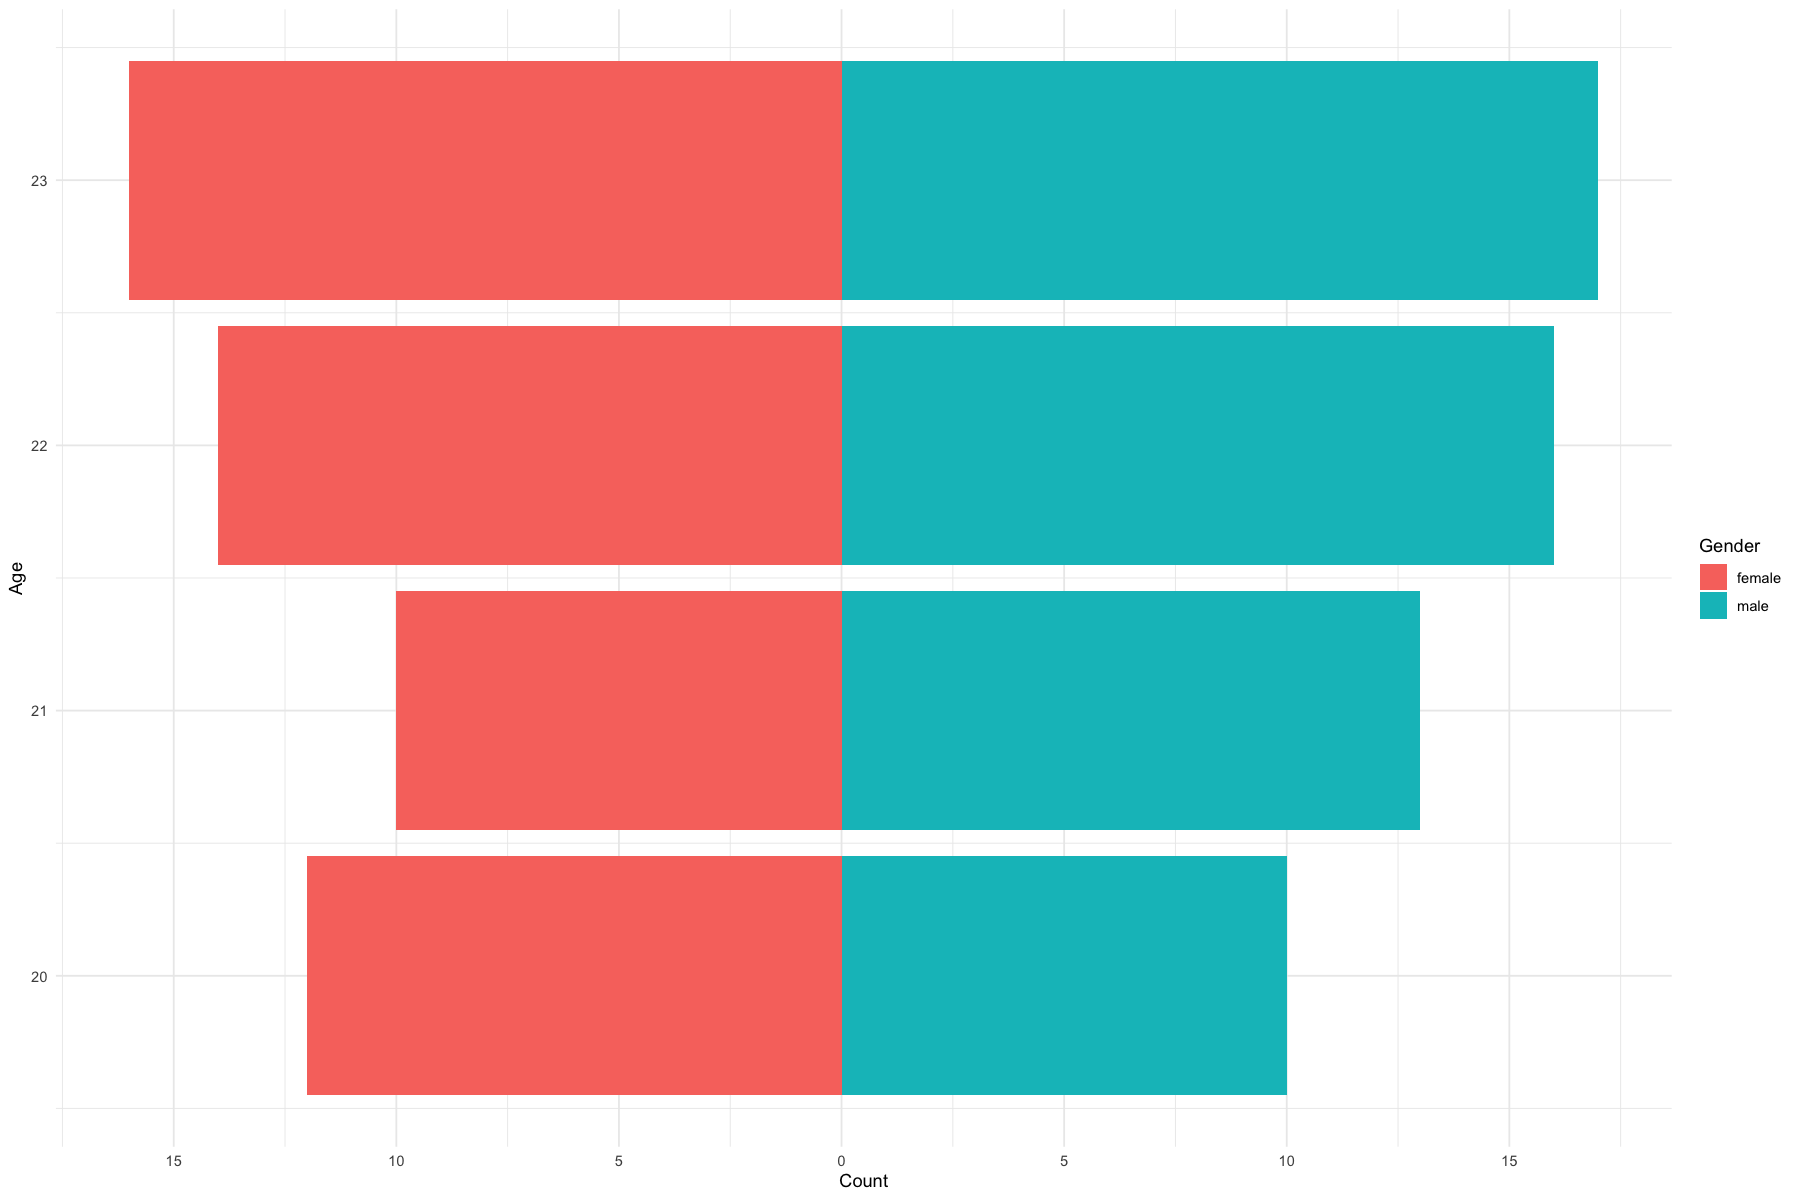

In [8]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(dplyr)

testdata <- data.frame(age = rep(c(20, 21, 22, 23), each = 2),
                       gender = rep(c("male", "female"), times = 4),
                       count = c(10, 12, 13, 10, 16, 14, 17, 16))

# Make female counts negative
testdata <- testdata %>% mutate(count = ifelse(gender == "female", -count, count))

# Create bar plots for male and female data
ggplot(testdata, aes(x = age, y = count, fill = gender)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_y_continuous(labels = abs, breaks = seq(-20, 20, by = 5)) +
  theme_minimal() +
  labs(x = "Age", y = "Count", fill = "Gender")

end.time <- Sys.time()
print(end.time - start.time)

# Histogram

Time difference of 0.4354172 secs


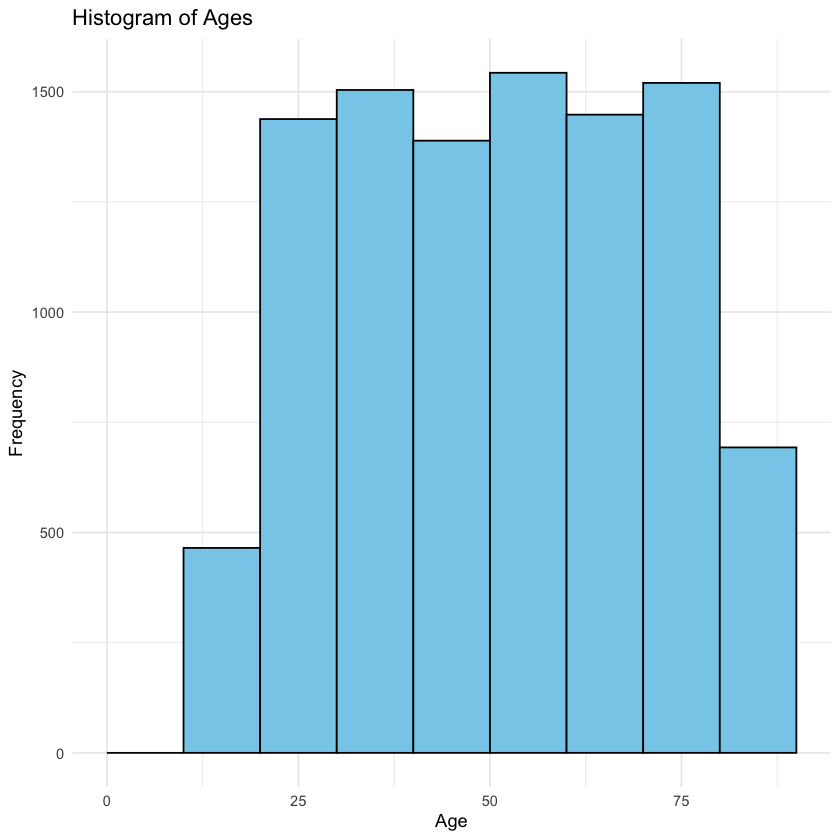

In [5]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)

# load data stored in a CSV file
df <- read.csv("data/healthcare_dataset2.csv", sep=";")

# Create a histogram of ages using ggplot2
ggplot(df, aes(x=Age)) +
  geom_histogram(breaks = seq(0, max(df$Age) + 10, by = 10), color="black", fill="skyblue") +
  labs(title="Histogram of Ages", x="Age", y="Frequency") +
  theme_minimal()

end.time <- Sys.time()
print(end.time - start.time)

# Krabicový graf

Time difference of 0.386718 secs


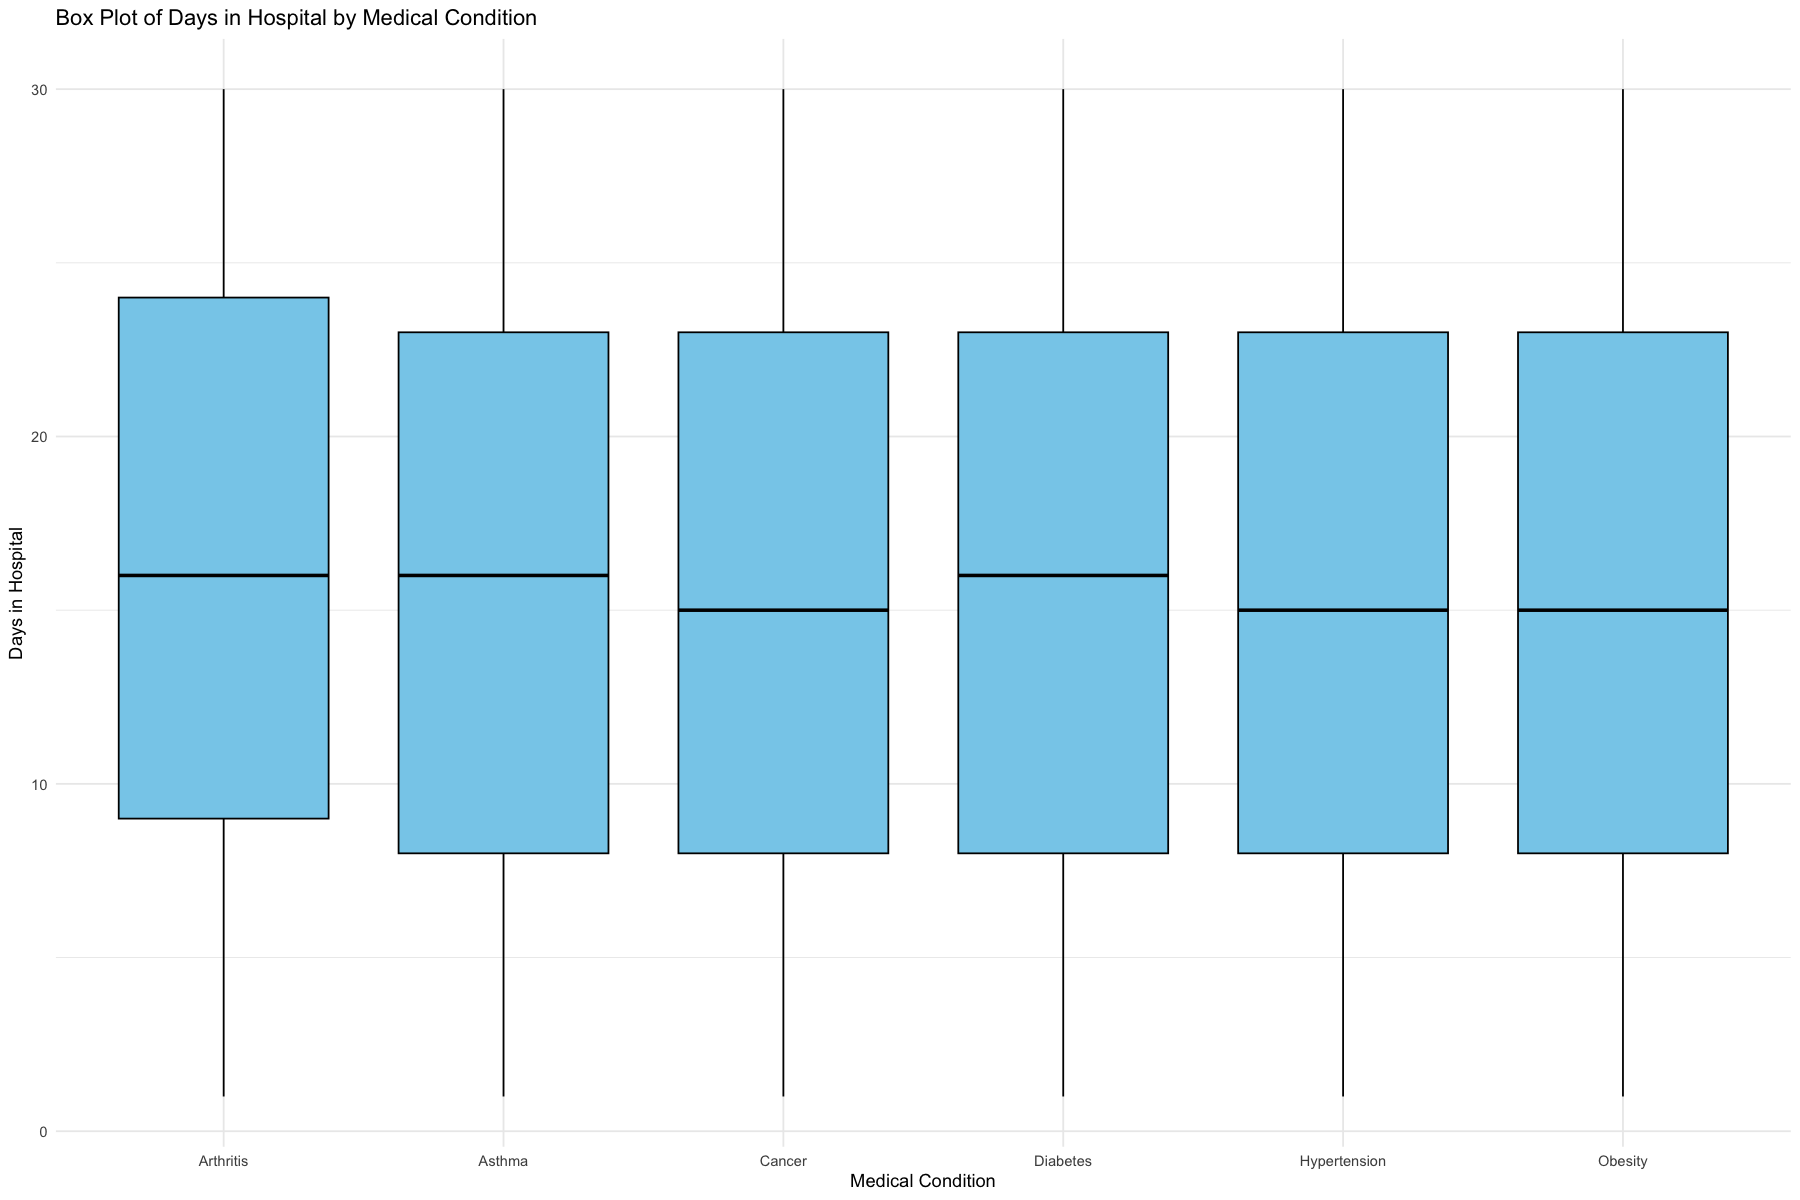

In [10]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)

# load data stored in a CSV file
df <- read.csv("data/healthcare_dataset2.csv", sep=";")

ggplot(df, aes(x = factor(Medical.Condition), y = Days.in.Hospital)) +
    geom_boxplot(color = "black", fill = "skyblue") +
    labs(title = "Box Plot of Days in Hospital by Medical Condition", x = "Medical Condition", y = "Days in Hospital") +
    theme_minimal()

end.time <- Sys.time()
print(end.time - start.time)

# Houslový graf

Time difference of 0.298409 secs


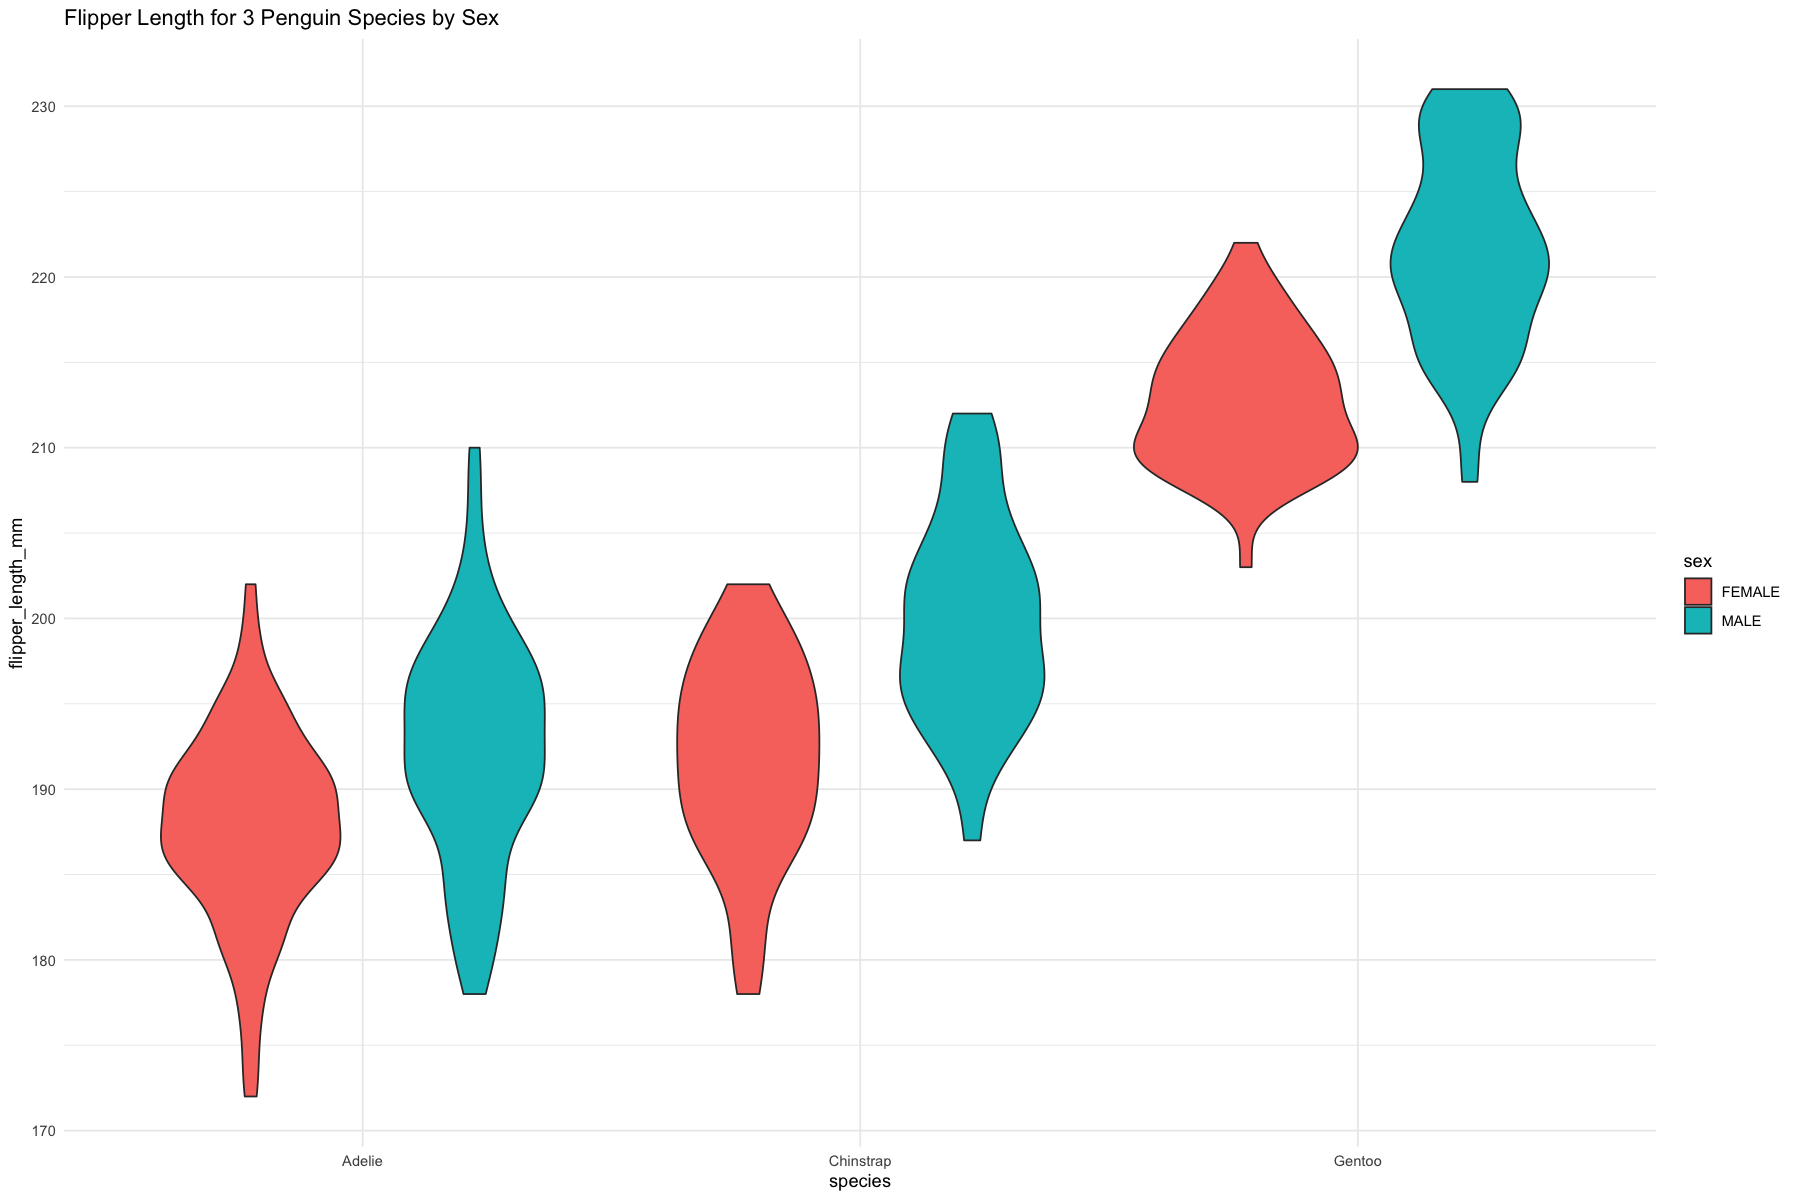

In [11]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)

# load data stored in a CSV file
data <- read.csv("data/penguins.csv")

# Remove missing values and keep only 'MALE' and 'FEMALE' in 'sex'
data <- data[complete.cases(data) & data$sex %in% c('MALE', 'FEMALE'), ]

# Create violin plot
ggplot(data, aes(x = species, y = flipper_length_mm, fill = sex)) +
  geom_violin() +
  labs(title = "Flipper Length for 3 Penguin Species by Sex") +
  theme_minimal()

end.time <- Sys.time()
print(end.time - start.time)

# Kategorické vizualizace

# Sloupcový graf

Time difference of 0.307672 secs


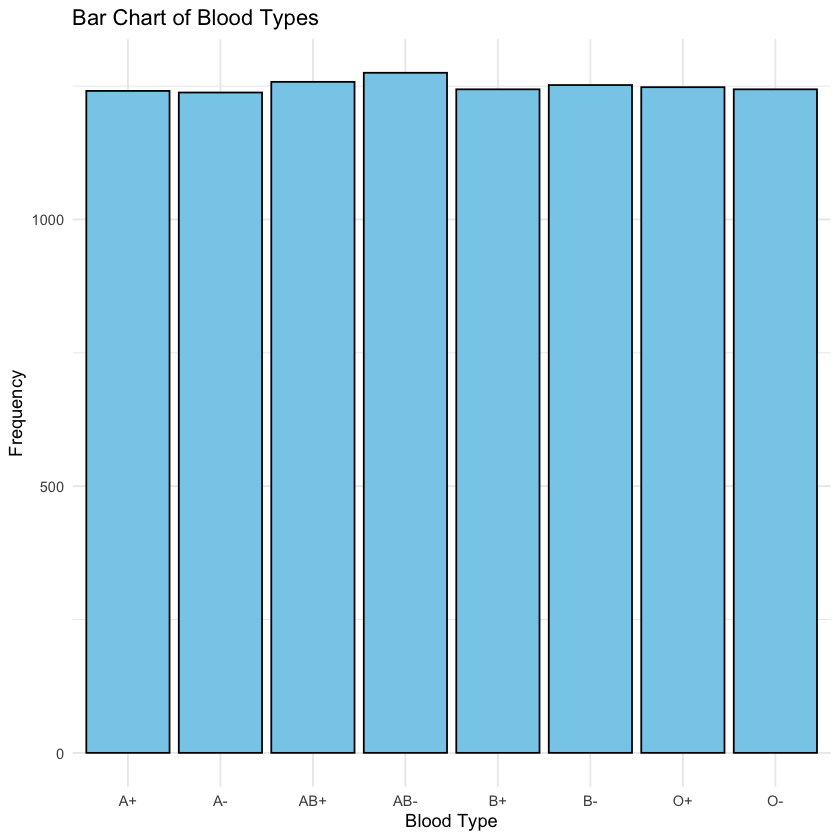

In [2]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)

# load data stored in a CSV file
df <- read.csv("data/healthcare_dataset2.csv", sep=";")

ggplot(df, aes(x = factor(Blood.Type), fill = factor(Blood.Type))) +
    geom_bar(color = "black", fill = "skyblue") +
    labs(title = "Bar Chart of Blood Types", x = "Blood Type", y = "Frequency") +
    theme_minimal()

end.time <- Sys.time()
print(end.time - start.time)

# Skupinový sloupcový graf


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




Time difference of 1.359996 secs


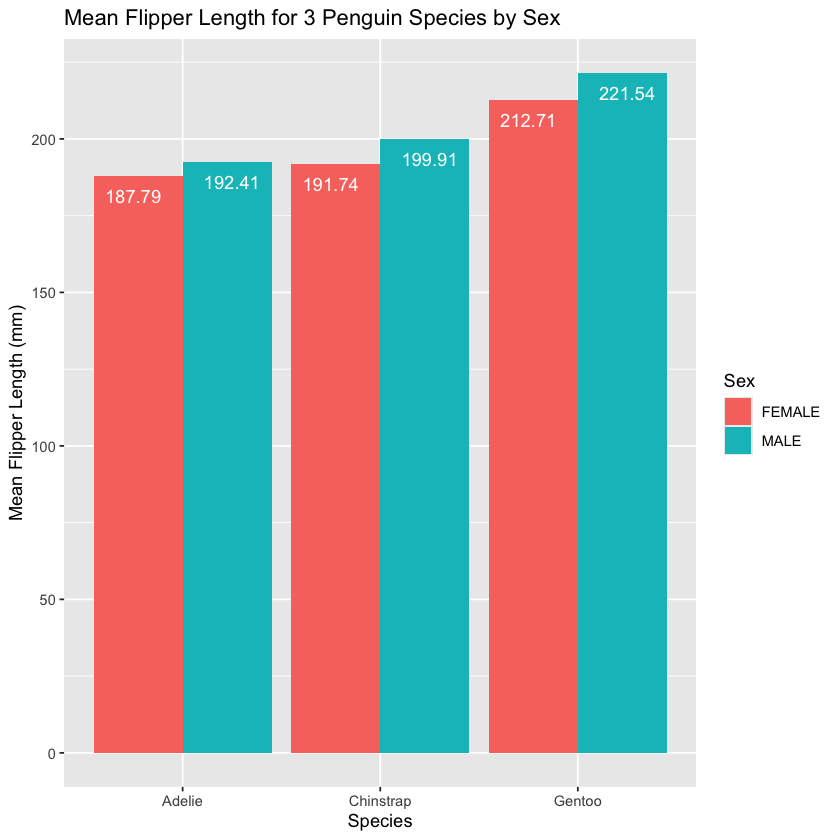

In [1]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(dplyr)

# load data stored in a CSV file
data <- read.csv('data/penguins.csv')

# Remove missing values and keep only 'MALE' and 'FEMALE' in 'sex'
data <- data[complete.cases(data) & data$sex %in% c('MALE', 'FEMALE'), ]

# Calculate the mean flipper length for each species and sex
mean_data <- data %>%
  group_by(species, sex) %>%
  summarise(flipper_length_mm = mean(flipper_length_mm, na.rm = TRUE), .groups="drop")

# Create a grouped bar chart
ggplot(mean_data, aes(fill=sex, y=flipper_length_mm, x=species)) + 
  geom_bar(position="dodge", stat="identity") +
  geom_text(aes(label=round(flipper_length_mm, 2)), vjust=2, color="white", position = position_dodge(1)) +
  labs(title = "Mean Flipper Length for 3 Penguin Species by Sex",
       x = "Species",
       y = "Mean Flipper Length (mm)",
       fill = "Sex")

end.time <- Sys.time()
print(end.time - start.time)

# Skládaný sloupcový graf

Time difference of 0.854037 secs


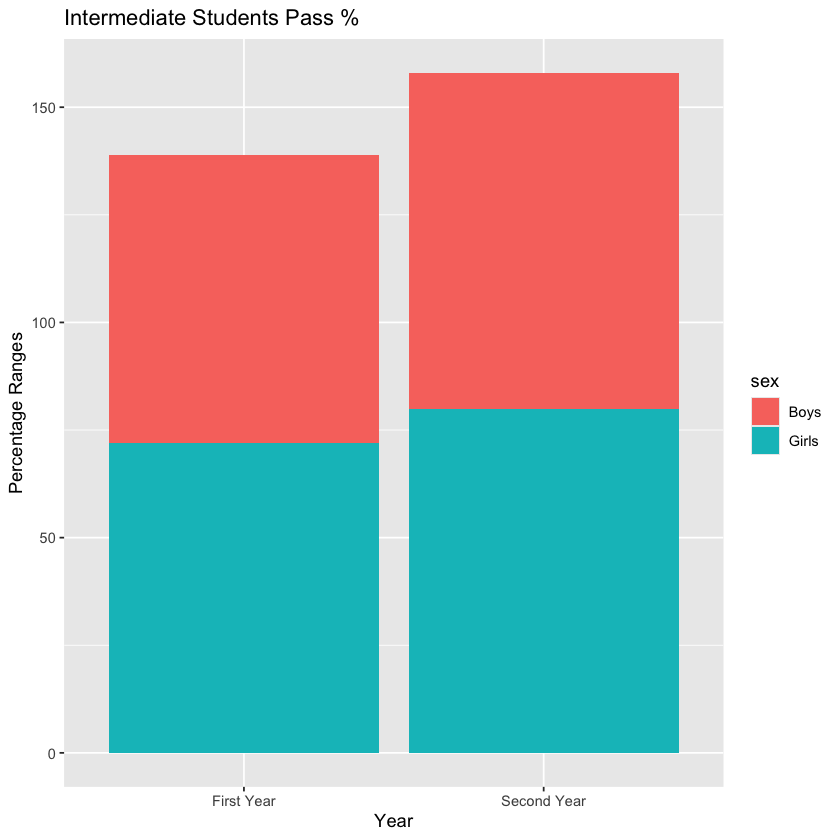

In [4]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load necessary libraries
library(ggplot2)
library(tidyr)

# Create data
students <- data.frame(Year = c("First Year", "Second Year"),
                       Boys = c(67, 78),
                       Girls = c(72, 80))

# Reshape data to long format
students_long <- pivot_longer(students, c(Boys, Girls), names_to = "Gender", values_to = "Percentage")

# Create a stacked bar chart
ggplot(students_long, aes(fill=Gender, y=Percentage, x=Year)) + 
  geom_bar(position="stack", stat="identity") +
  labs(title="Intermediate Students Pass %", x="Year", y="Percentage Ranges", fill="sex") 

end.time <- Sys.time()
print(end.time - start.time)

# Paprskový graf

Warning message in geom_polygon(fill = NA, size = 1.1, closed = TRUE):
“Ignoring unknown parameters: `closed`”


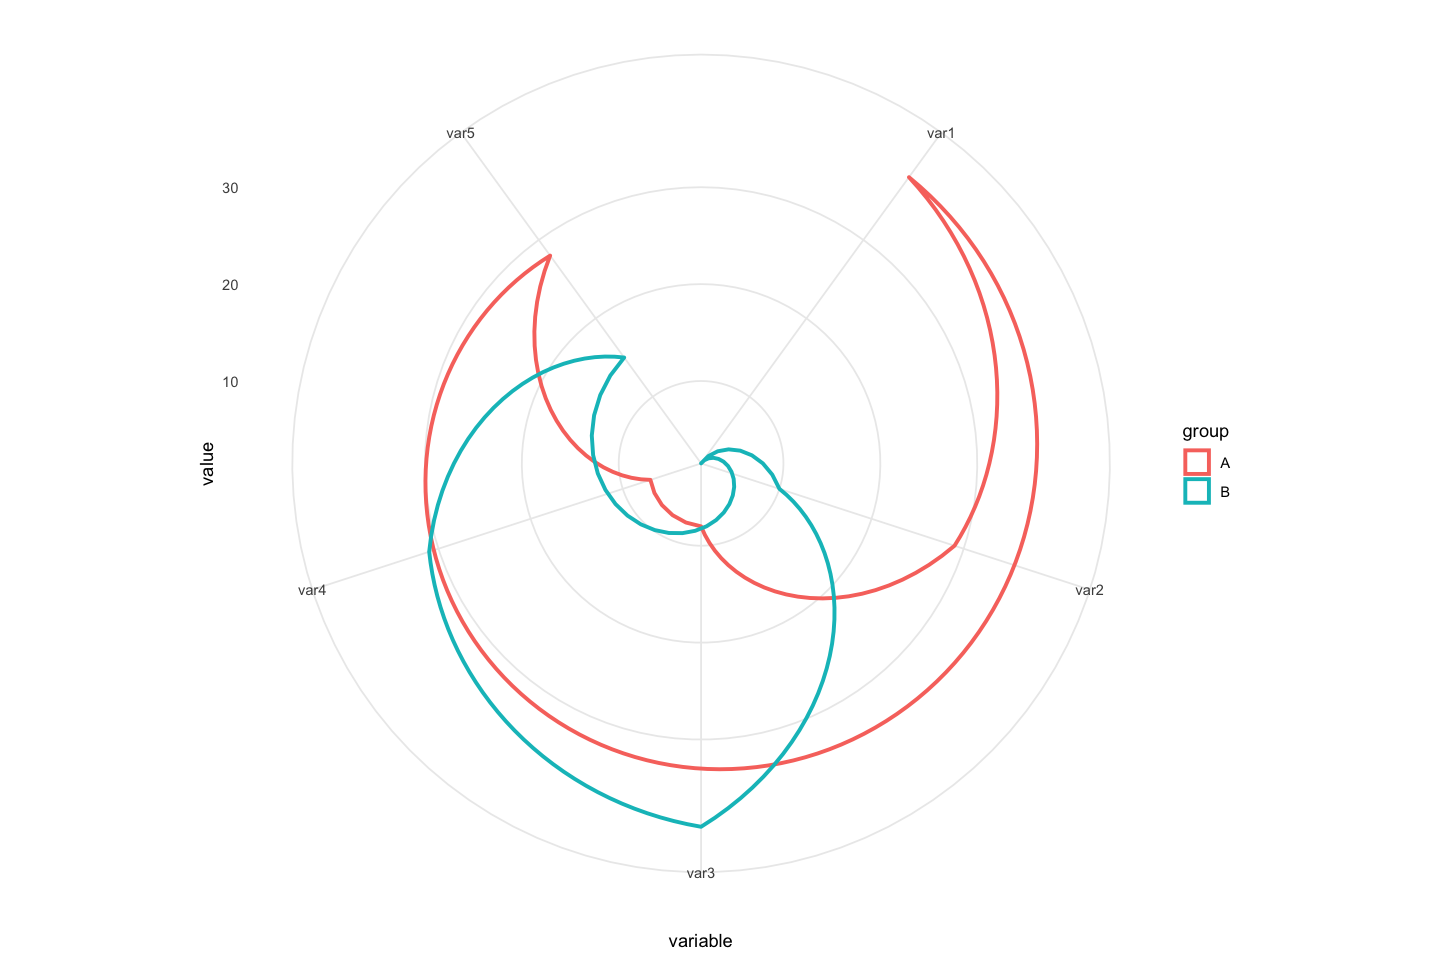

In [43]:
# Load necessary libraries
library(ggplot2)
library(reshape2)

# Set data
df <- data.frame(
  group = c('A', 'B', 'C', 'D'),
  var1 = c(38, 1.5, 30, 4),
  var2 = c(29, 10, 9, 34),
  var3 = c(8, 39, 23, 24),
  var4 = c(7, 31, 33, 14),
  var5 = c(28, 15, 32, 14)
)

# Reshape DataFrame
df_melt <- melt(df, id.vars = 'group')

# Specify groups to show
groups_to_show <- c('A', 'B')

# Filter DataFrame
df_melt_filtered <- df_melt[df_melt$group %in% groups_to_show, ]

# Create radar chart
ggplot(df_melt_filtered, aes(x = variable, y = value, group = group, color = group)) +
  geom_polygon(fill = NA, size = 1.1, closed = TRUE) +
  coord_polar() +
  theme_minimal()

# Hierarchické vizualizace

# Teplotlní mapa

Time difference of 0.2319701 secs


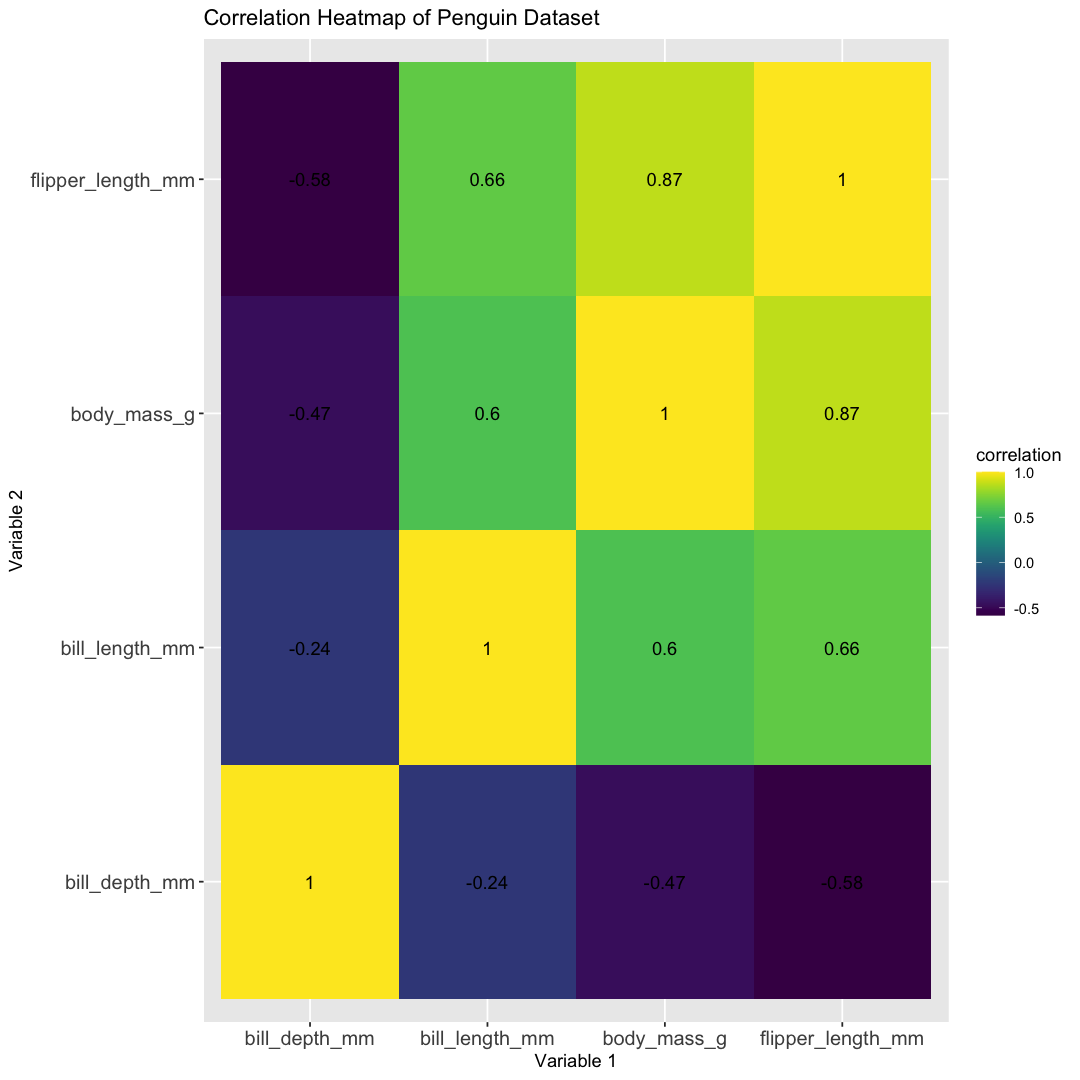

In [8]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(tidyr)
library(viridis)
library(dplyr)

# load data stored in a CSV file
penguins <- read.csv('data/penguins.csv')

# Remove missing values
penguins <- na.omit(penguins)

# Set the default plot size
options(repr.plot.width=9, repr.plot.height=9)

# Select columns 3 to 6
selected_columns <- penguins[, 3:6]

# Calculate correlation matrix
correlation_matrix <- cor(selected_columns)

# Convert the correlation matrix to a dataframe
correlation_df <- as.data.frame(correlation_matrix)
rownames(correlation_df) <- colnames(correlation_matrix)

# Reshape the dataframe for ggplot
correlation_df <- correlation_df %>%
  tibble::rownames_to_column(var = "variable1") %>%
  pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")

# Plot heatmap with viridis palette and correlation values
ggplot(correlation_df, aes(x = variable1, y = variable2, fill = correlation, label = round(correlation, 2))) +
  geom_tile() +
  geom_text(color = "black") +  # Add text labels
  scale_fill_viridis() +  # Use viridis color palette
  labs(title = "Correlation Heatmap of Penguin Dataset", x = "Variable 1", y = "Variable 2") +
  theme(axis.text = element_text(size = 12))

end.time <- Sys.time()
print(end.time - start.time)

# Bublinový graf

Time difference of 0.19752 secs


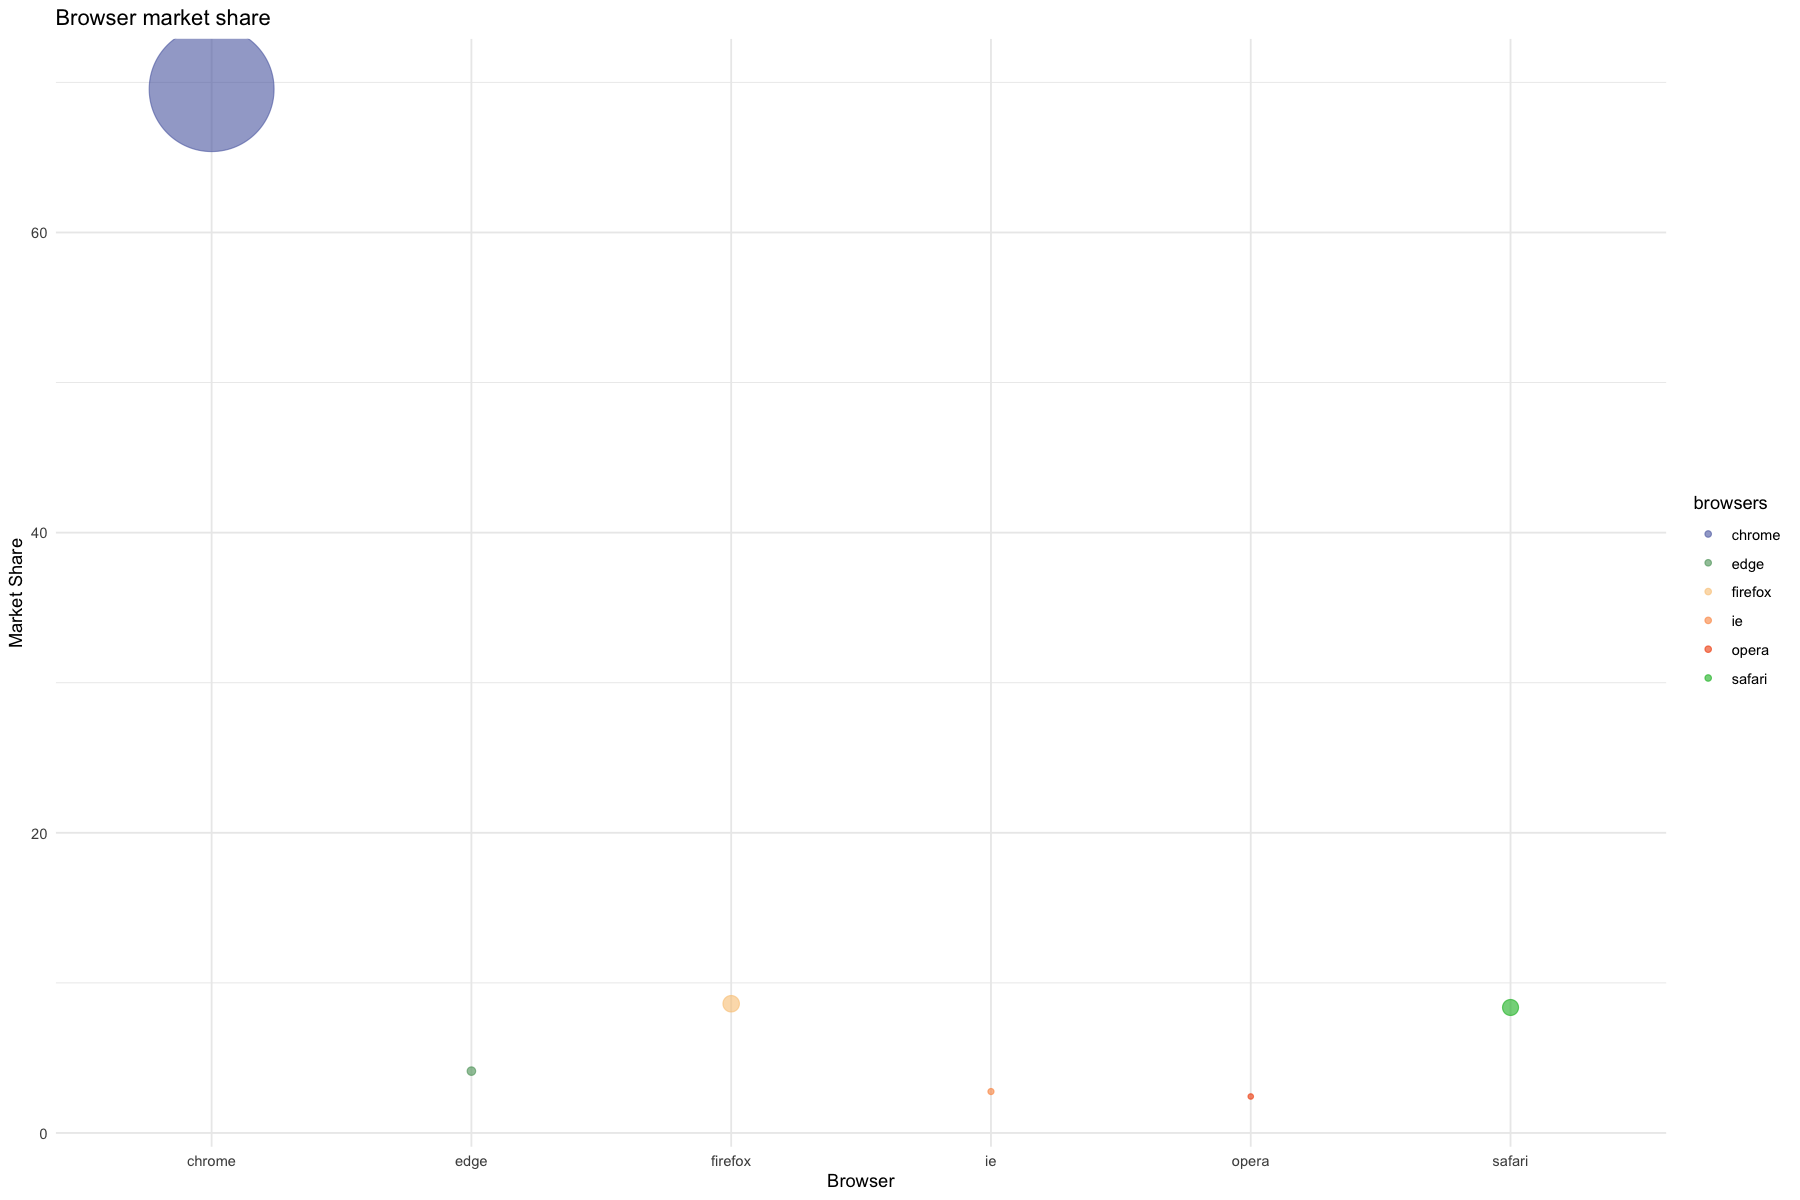

In [17]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)

# Data
browser_market_share <- data.frame(
  browsers = c('firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'),
  market_share = c(8.61, 69.55, 8.36, 4.12, 2.76, 2.43),
  color = c('#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825')
)


# Create a bubble chart
ggplot(browser_market_share, aes(x = browsers, y = market_share, size = market_share, color = browsers)) +
  geom_point(alpha = 0.6, size = browser_market_share$market_share * 0.50) +  # Adjust size here
  scale_color_manual(values = browser_market_share$color) +
  theme_minimal() +
  labs(title = 'Browser market share', x = 'Browser', y = 'Market Share') +
  guides(size = "none")  # Remove size legend only

end.time <- Sys.time()
print(end.time - start.time)